# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

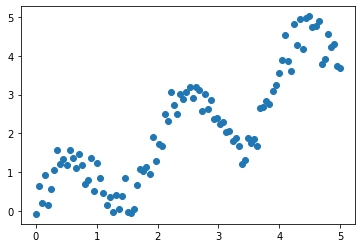

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5882433193932092


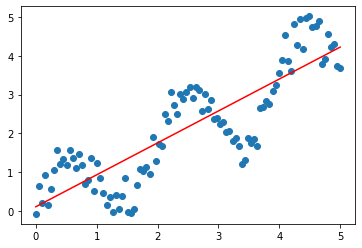

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

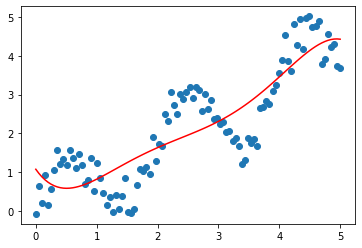

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.25612473  3.24012373 -1.54483287  0.33016205 -0.02547682]
interception:  1.0743498816632058


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.07434988, 0.96847209, 0.87795959, 0.80169437, 0.73860796,
       0.68768043, 0.64793941, 0.61845903, 0.59835898, 0.58680344,
       0.58300014, 0.58619931, 0.59569268, 0.61081251, 0.63093054,
       0.65545701, 0.68383965, 0.71556269, 0.75014582, 0.78714323,
       0.82614256, 0.86676394, 0.90865894, 0.95150961, 0.99502745,
       1.03895241, 1.08305186, 1.12711965, 1.17097504, 1.21446173,
       1.25744684, 1.29981992, 1.34149193, 1.38239426, 1.42247768,
       1.46171138, 1.50008195, 1.53759237, 1.57426101, 1.61012063,
       1.64521736, 1.67960972, 1.71336758, 1.7465712 , 1.77931019,
       1.81168251, 1.84379349, 1.8757548 , 1.90768345, 1.93970078,
       1.9719315 , 2.0045026 , 2.03754244, 2.07117966, 2.10554226,
       2.14075651, 2.17694601, 2.21423066, 2.25272564, 2.29254044,
       2.33377785, 2.3765329 , 2.42089195, 2.46693159, 2.51471772,
       2.56430446, 2.61573324, 2.6690317 , 2.72421276, 2.78127358,
       2.84019456, 2.90093833, 2.96344876, 3.02764996, 3.09344

In [15]:
regr_poly.predict(X_poly)

array([1.07434988, 0.96847209, 0.87795959, 0.80169437, 0.73860796,
       0.68768043, 0.64793941, 0.61845903, 0.59835898, 0.58680344,
       0.58300014, 0.58619931, 0.59569268, 0.61081251, 0.63093054,
       0.65545701, 0.68383965, 0.71556269, 0.75014582, 0.78714323,
       0.82614256, 0.86676394, 0.90865894, 0.95150961, 0.99502745,
       1.03895241, 1.08305186, 1.12711965, 1.17097504, 1.21446173,
       1.25744684, 1.29981992, 1.34149193, 1.38239426, 1.42247768,
       1.46171138, 1.50008195, 1.53759237, 1.57426101, 1.61012063,
       1.64521736, 1.67960972, 1.71336758, 1.7465712 , 1.77931019,
       1.81168251, 1.84379349, 1.8757548 , 1.90768345, 1.93970078,
       1.9719315 , 2.0045026 , 2.03754244, 2.07117966, 2.10554226,
       2.14075651, 2.17694601, 2.21423066, 2.25272564, 2.29254044,
       2.33377785, 2.3765329 , 2.42089195, 2.46693159, 2.51471772,
       2.56430446, 2.61573324, 2.6690317 , 2.72421276, 2.78127358,
       2.84019456, 2.90093833, 2.96344876, 3.02764996, 3.09344

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [17]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [18]:
sigma = 0.3

In [19]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [20]:
regr_rbf = LinearRegression()

In [21]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

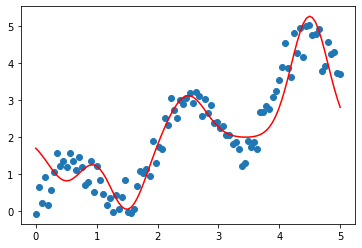

In [22]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [23]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.16204568 -1.93667299  1.13758157 -0.005069    3.27382174]
interception:  1.9839390065990865


#### Comparison

In [24]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

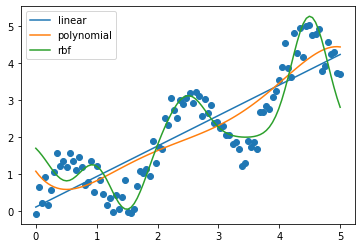

In [25]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [26]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5882433193932092


In [27]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.525038958819237


In [28]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.26911474265547985
